Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Original image


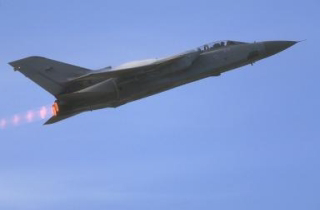

flip image


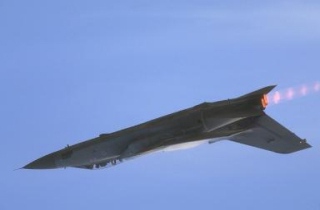

Scaling image


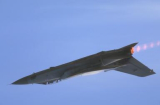

Rotation (45 degree) image


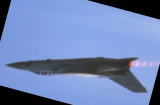

Translation (x:+30, y:+20) image


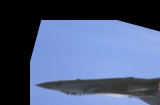

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
'''
어파인 변환
선형의 2차원 변환이용, 여러가지 변환들의 선형 결합 연산을 통해 새로운 좌표로 매핑
여러개 변환도 포함가능
'''
drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')
flipBoth = cv2.flip(img, -1)  #세로축 기준
#영상 크기변환
resize = cv2.resize(flipBoth,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

height,width = resize.shape[:2]
# 회전점을 영상 모서리 -> 영상의 중심으로 변경
M = cv2.getRotationMatrix2D(((width-1)/2.0,(height-1)/2.0),-15,1)
# 회전점을 영상 모서리로 한 경우
#M = cv2.getRotationMatrix2D((0,0),-15,1)
rotate = cv2.warpAffine(resize,M,(width,height)) #회전변환
M = np.float32([[1,0,30],[0,1,+20]])
translate = cv2.warpAffine(rotate,M,(width,height))#이동변환

#그림을 화면에 출력
#plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
print("Original image")
cv2_imshow(img)
print("flip image")
cv2_imshow(flipBoth)
print("Scaling image")
cv2_imshow(resize)
print("Rotation (45 degree) image")
cv2_imshow(rotate)
print("Translation (x:+30, y:+20) image")
cv2_imshow(translate)